<a href="https://colab.research.google.com/github/lionheart7dec/My_files/blob/master/Breast_cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing relevant libraries 
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
from sklearn.datasets import load_breast_cancer

cnr=load_breast_cancer()
cnr

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [4]:
cnr.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cnr['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(cnr['target_names'])
print(cnr['target'])

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [0]:
cnr_df = pd.DataFrame( np.c_[cnr['data'], cnr['target']], columns = np.append(cnr['feature_names'], 'target' ))

In [11]:
cnr_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [12]:
cnr_df.shape

(569, 31)

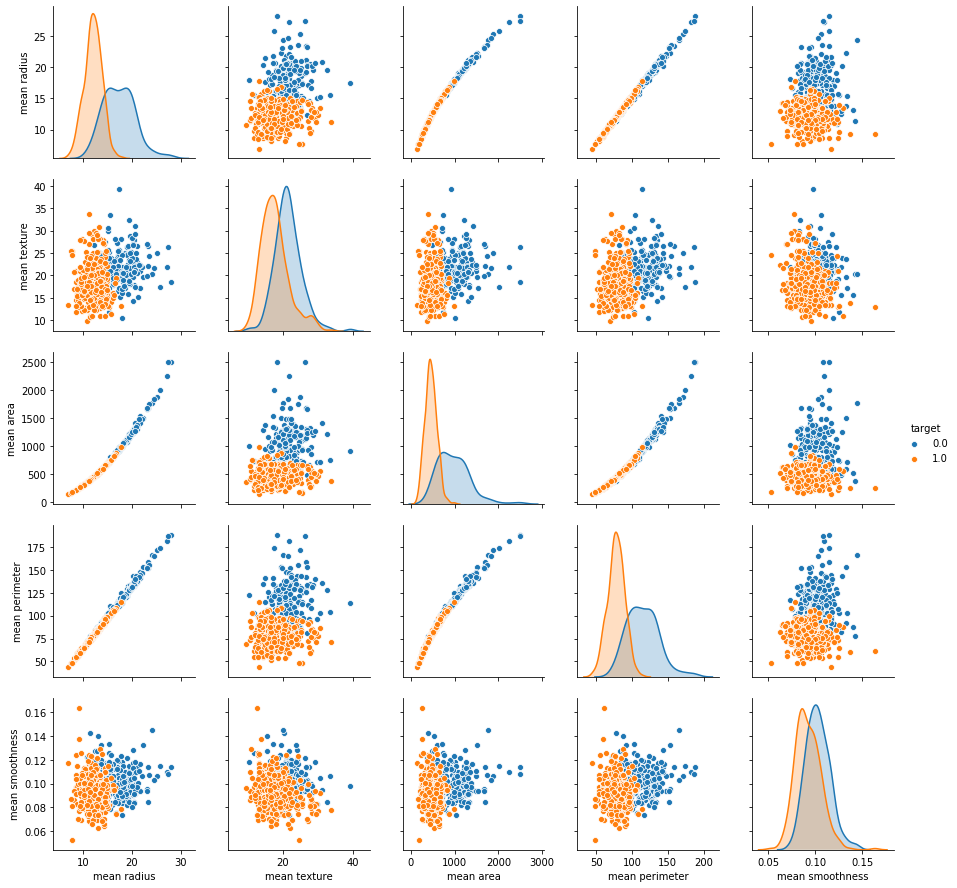

In [13]:
sns.pairplot(cnr_df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

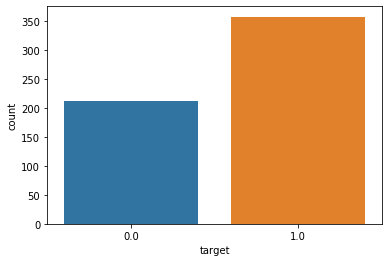

In [14]:
sns.countplot(cnr_df['target'], label= 'count')

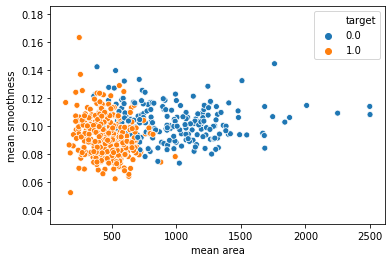

In [15]:
sns.scatterplot(x= 'mean area', y= 'mean smoothness', hue= 'target', data = cnr_df)

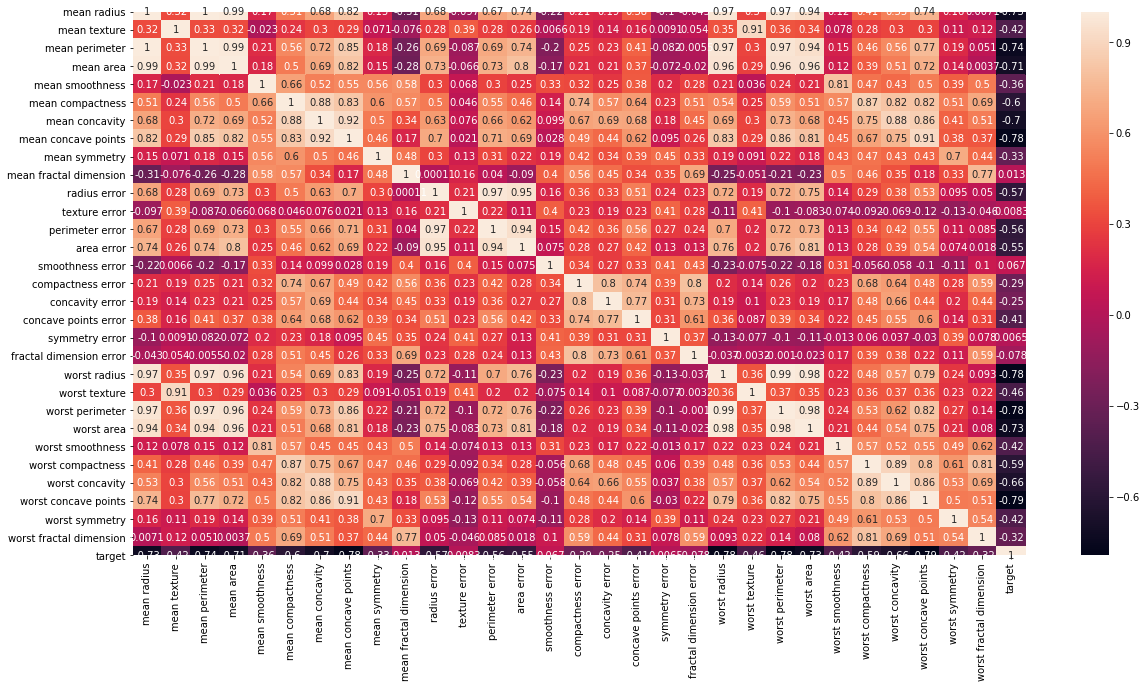

In [16]:
plt.figure( figsize= (20,10))
sns.heatmap(cnr_df.corr(), annot= True)

In [0]:
X= cnr_df.drop(['target'], axis=1)
y= cnr_df['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33)

In [19]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
y_predict=svc.predict(X_test)
y_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

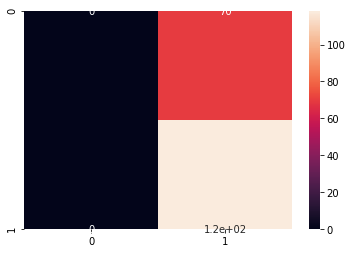

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        70
         1.0       0.63      1.00      0.77       118

    accuracy                           0.63       188
   macro avg       0.31      0.50      0.39       188
weighted avg       0.39      0.63      0.48       188



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
min_train = X_train.min()
range_train = (X_train-min_train).max()

X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
419,0.197785,0.395671,0.187686,0.100445,0.378468,0.126198,0.020982,0.053479,0.280303,0.237288,0.063371,0.291239,0.056421,0.022764,0.240320,0.062193,0.017606,0.116670,0.355706,0.040255,0.157595,0.450426,0.143682,0.067047,0.376610,0.081022,0.032416,0.148329,0.278139,0.106192
82,0.863221,0.514034,0.882524,0.735737,0.423872,0.844076,0.782334,0.916998,0.388384,0.372458,0.284555,0.246155,0.311694,0.211428,0.298515,0.521511,0.144697,0.384543,0.051663,0.172678,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.586063,0.987599,0.155726,0.328348
527,0.253632,0.086574,0.242900,0.137858,0.259711,0.137623,0.069306,0.131561,0.317677,0.166102,0.001847,0.029946,0.000000,0.004021,0.091039,0.059552,0.022051,0.108733,0.063608,0.016279,0.202063,0.193230,0.183326,0.093320,0.383213,0.174744,0.162081,0.368584,0.304554,0.136954
333,0.202045,0.171458,0.190657,0.104560,0.189386,0.073413,0.002281,0.014617,0.360101,0.223941,0.037262,0.140537,0.035721,0.015443,0.180599,0.039773,0.002459,0.055711,0.170182,0.039219,0.171825,0.267591,0.157727,0.075575,0.300007,0.068545,0.004994,0.057423,0.246403,0.125541
518,0.279190,0.287792,0.280976,0.148293,0.580264,0.495416,0.113051,0.263569,0.327778,0.472246,0.119899,0.178748,0.113379,0.051491,0.164685,0.196135,0.035480,0.235651,0.191832,0.083060,0.253291,0.329158,0.243538,0.120306,0.491514,0.260801,0.112760,0.377540,0.200473,0.222288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.127550,0.115996,0.140488,0.054719,0.617597,0.683984,0.278351,0.349801,0.503535,0.964195,0.058990,0.227590,0.047886,0.020299,0.927835,0.443649,0.131035,0.274673,0.344134,0.365698,0.094984,0.160448,0.094925,0.035121,0.854718,0.328909,0.263620,0.370307,0.252908,0.533648
422,0.219083,0.213392,0.218851,0.112280,0.449097,0.324212,0.166284,0.223509,0.417172,0.274576,0.048561,0.082589,0.042228,0.016974,0.192950,0.164797,0.066439,0.247016,0.197805,0.037561,0.167556,0.203891,0.156980,0.071397,0.464439,0.184058,0.208326,0.380641,0.240883,0.126131
447,0.370060,0.268854,0.359961,0.225366,0.277469,0.227323,0.095337,0.112326,0.420707,0.182627,0.039435,0.057881,0.033505,0.024184,0.142619,0.084130,0.044394,0.130650,0.273582,0.037181,0.302383,0.285714,0.276358,0.158351,0.339629,0.156019,0.186425,0.286187,0.401143,0.116818
498,0.544702,0.264119,0.535623,0.392153,0.372414,0.375955,0.349344,0.456412,0.389899,0.354449,0.246533,0.151344,0.192356,0.166172,0.289633,0.281735,0.111995,0.297973,0.154690,0.150636,0.527215,0.289446,0.478062,0.347719,0.462458,0.273219,0.319729,0.572856,0.186280,0.258494


In [0]:
min_test = X_test.min()
range_test = (X_test-min_test).max()

X_test_scaled = (X_test - min_test)/range_test

In [31]:
svc= SVC()
svc.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

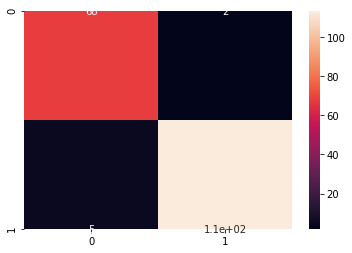

In [32]:
y_predict=svc.predict(X_test_scaled)

cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        70
         1.0       0.98      0.96      0.97       118

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



In [0]:
# Import other important Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [0]:
def modeller(X,y,model):
    model.fit(X,y)
    return model

In [0]:
def scorer(X,y,model):
    pred = model.predict(X)
    acc = round(accuracy_score(y,pred),4)
    recc = round(recall_score(y,pred),4)
    return (acc,recc)

In [49]:
# Lets build models for Logistic Regression, Neural Network and Support Vector Machine Models
lr = modeller(X_train,y_train,LogisticRegression(solver='lbfgs',))
mlp = modeller(X_train,y_train,MLPClassifier())
dt = modeller(X_train,y_train,DecisionTreeClassifier())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [50]:
print('Model Name \t\t| Accuracy \t| Recall Acuracy')
print('-'*50)
acc,recc = scorer(X_test,y_test,lr)
print('Logistic Regression \t| {} \t| {}'.format(acc,recc))
acc,recc = scorer(X_test,y_test,mlp)
print('Neural Network \t\t| {} \t| {}'.format(acc,recc))
acc,recc = scorer(X_test,y_test,dt)
print('Decision Tree \t\t| {} \t| {}'.format(acc,recc))
print('-'*50)

Model Name 		| Accuracy 	| Recall Acuracy
--------------------------------------------------
Logistic Regression 	| 0.9628 	| 0.9661
Neural Network 		| 0.9362 	| 0.9746
Decision Tree 		| 0.9309 	| 0.9322
--------------------------------------------------


In [0]:
def roc_scorer(X,y,model):
    preds = model.predict_proba(X)[:,1]
    fpr,tpr,_ = roc_curve(y,preds)
    roc_auc = round(auc(fpr,tpr),6)
    return (fpr,tpr,roc_auc)

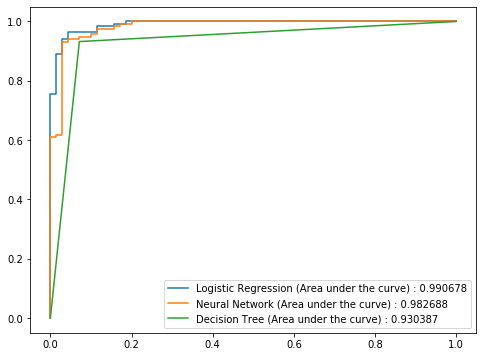

In [52]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
fpr,tpr,roc_auc = roc_scorer(X_test,y_test,lr)
ax.plot(fpr,tpr,label='Logistic Regression (Area under the curve) : {}'.format(roc_auc))
fpr,tpr,roc_auc = roc_scorer(X_test,y_test,mlp)
ax.plot(fpr,tpr,label='Neural Network (Area under the curve) : {}'.format(roc_auc))
fpr,tpr,roc_auc = roc_scorer(X_test,y_test,dt)
ax.plot(fpr,tpr,label='Decision Tree (Area under the curve) : {}'.format(roc_auc))
plt.legend(loc=4)

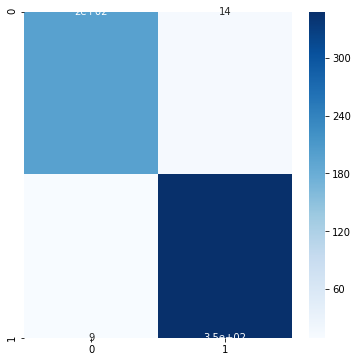

In [54]:
# Confusion Matrix
fig = plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y,lr.predict(X)),annot=True,cmap='Blues')

In [55]:
# Classification report by LR
print(classification_report(y,lr.predict(X)))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       212
         1.0       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.96       569
weighted avg       0.96      0.96      0.96       569



The SVM model is predicting around 562 instances correctly, out of total 569.